**IBM Assessment, Statistics for data science**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [3]:
boston_df=pd.read_csv(boston_url)

**PLOT 1: A box plot for the Median value of owner occupied homes**

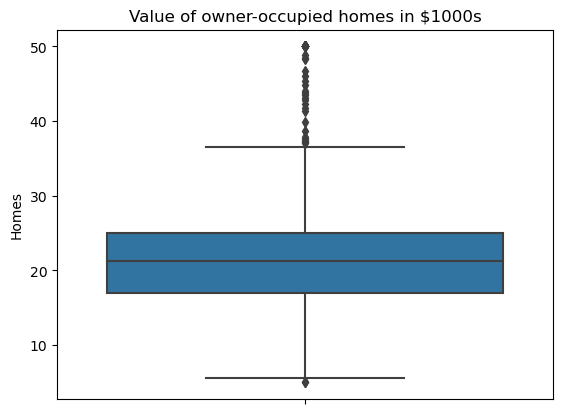

In [5]:
# Create the box plot using seaborn for the median value of owner occupied homes
ax = sns.boxplot(y=boston_df['MEDV'])
ax.set_ylabel('Homes')
ax.set_title('Value of owner-occupied homes in $1000s')
plt.show()

In [6]:
central = (np.median(boston_df['MEDV']))
print("median:", central)

median: 21.2


**RESULT**: The result as seen in the boxplot shows that the median value of owner occupied homes is 21.2.

   **PLOT 2: A bar plot for the Charles river variable**

Text(0.5, 1.0, 'Charles River Variable')

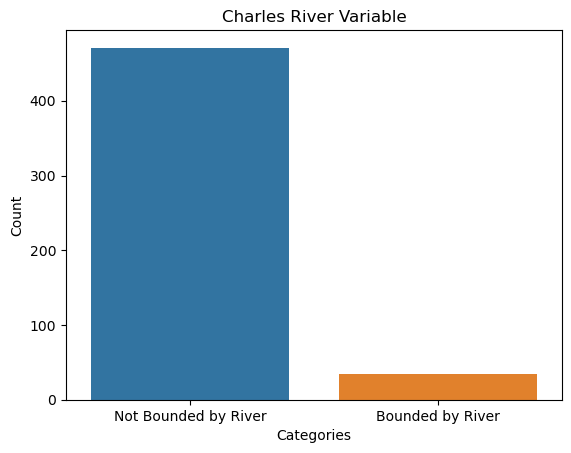

In [7]:
count_zeros = boston_df['CHAS'].value_counts()[0]
count_ones = boston_df['CHAS'].value_counts()[1]
ay = sns.barplot(x=['Not Bounded by River', 'Bounded by River'], y=[count_zeros,count_ones])
ay.set_xlabel('Categories')
ay.set_ylabel('Count')
ay.set_title('Charles River Variable')

**PLOT 3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

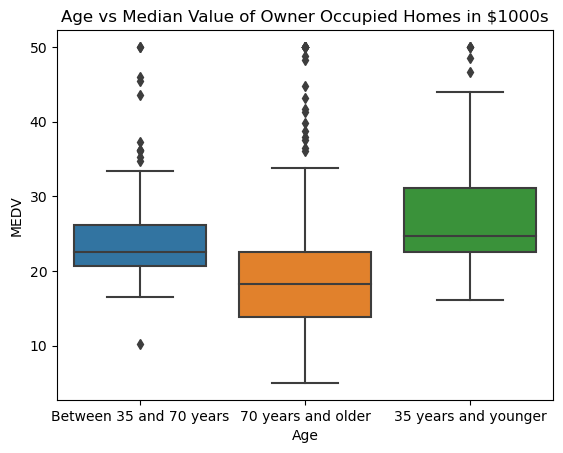

In [36]:
boston_df['AGE_group'] = ''
boston_df.loc[(boston_df['AGE'] <= 40), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 70), 'AGE_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'AGE_group'] = '70 years and older'

# Create the box plot using seaborn
av = sns.boxplot(y='MEDV', x='AGE_group', data=boston_df)

# Set labels and title
av.set_xlabel("Age")
av.set_title('Age vs Median Value of Owner Occupied Homes in $1000s')

# Show the plot
plt.show()

The box plot above shows that age group 35 years and below has both the higher median and maximum value of owner occupied homes, while age group 70 years and above has the lowest median value but a slightly higher maximum value when compared to the maximum value of age group between 35 to 70 years.

**PLOT 4:Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

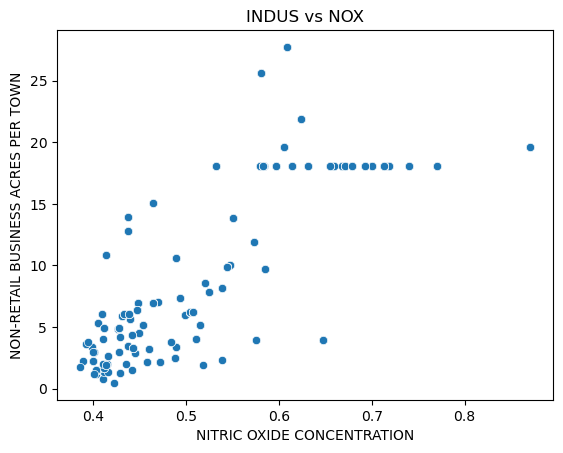

In [6]:
az = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Set labels and title
az.set_xlabel('NITRIC OXIDE CONCENTRATION')
az.set_ylabel('NON-RETAIL BUSINESS ACRES PER TOWN')
az.set_title('INDUS vs NOX')
plt.show()

In [ ]:
The scatter plot of NITRIC OXIDE CONCENTRATION AND NON-RETAIL BUSINESS ACRES PER TOWN shows a positive correlation.

**PLOT 5: Create a histogram for pupil to teacher ratio variable**

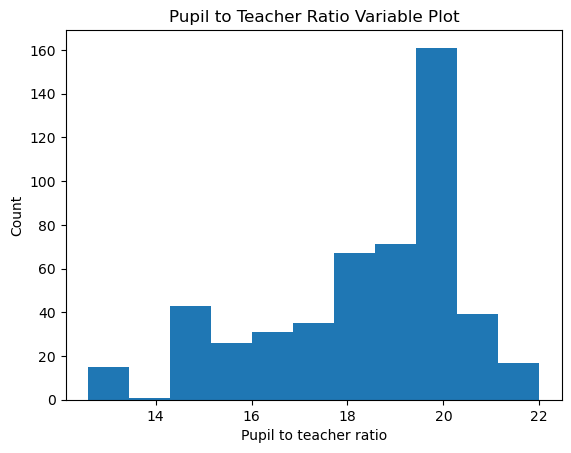

In [31]:
#A histogram for pupil to teacher ratio variable
aw = plt.hist(boston_df['PTRATIO'], bins=11)
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Count')
plt.title('Pupil to Teacher Ratio Variable Plot')
plt.show()

**STAT TEST 1: Is there a significant difference in the median value of houses (MEDV) bounded by the Charles river or not? (T-test for independent samples)**

Null Hypothesis H0: there is no difference in the median value of houses (MEDV) bounded by the Charles river.
Alternate Hypothesis H1: There is a difference in the median value of houses (MEDV) bounded by the charles river.
Significance level: 0.05

In [28]:
ak = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '0']['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'])
print(ak)

Ttest_indResult(statistic=nan, pvalue=nan)


**Explanation**: the significant imbalance in sample sizes between the two groups not bounded by river vs bounded by river, 471 records vs. 34 records respectively, could be 
a problem when performing a two-sample t-test. The t-test assumes that the samples are drawn from populations with approximately 
equal variances. When the sample sizes are highly imbalanced, it can lead to unreliable results and skewed interpretations such as seen above.

**STAT TEST 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

Null hypothesis: The means of the median value of owner occupied homes does not differ from that of proportion of owner-occupied units built prior to 1940. (i.e. H0 : The MEDV variable and AGE variable were drawn from the same population, and have equal means)
Alternate Hypothesis: the MEDV variable and the AGE variable have different means. Significance level alpha for the F-test = 0.05%

In [26]:
#Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])

print("F_statistic: {0}, P-value {1}".format(f_statistic, p_value))
# Print the results
#print("F-Statistic:", f_statistic)
#print("P-value:", p_value)

F_statistic: 1223.1740271875933, P-value 3.20946197250671e-176


From the above result of the F-test, The P-value is greater than our significance level of 0.05, hence we fail to reject the null hypothesis and conclude that there is no difference between the means of MEDV variable and AGE variable.

**STAT TEST 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

H0 =  there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
H1 = there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

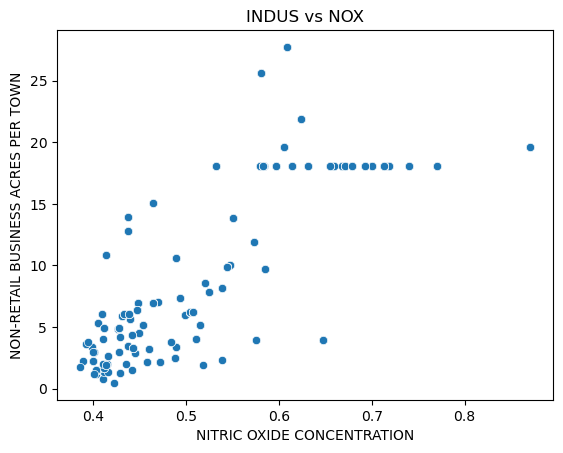

PearsonRResult(statistic=-0.37695456500459623, pvalue=1.5699822091877261e-18)

In [27]:
az = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Set labels and title
az.set_xlabel('NITRIC OXIDE CONCENTRATION')
az.set_ylabel('NON-RETAIL BUSINESS ACRES PER TOWN')
az.set_title('INDUS vs NOX')
plt.show()

scipy.stats.pearsonr(boston_df['MEDV'], boston_df['AGE'])

The above plot shows a positive correlation.

Since the the P-value is less than the significant level(two-tailed) of 0.05, we reject the null hypothesis and concluded that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**STAT TEST 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?**

In [29]:
# Create the input variables (independent variable)
X = boston_df['DIS']

# Create the target variable (dependent variable)
y = boston_df['MEDV']

# Add a constant term to the input variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        01:18:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Regression result interpretation**

MEDV = 18.390 + 1.091 (DIS) + Error.
This means that for every additional weighted distance  to the five Boston employment centres, the median value of owner occuppied homes is increased by a factor of 1.091.